<a href="https://colab.research.google.com/github/khbae/trading/blob/master/13_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Descent : Linear Regression

### Basic Setting

In [0]:
# 기본 모듈 세팅

!pip install pandas_datareader # 주식 데이터를 불러오는 패키지

import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import math

    100% |████████████████████████████████| 112kB 4.5MB/s 
    100% |████████████████████████████████| 5.6MB 5.1MB/s 
  Running setup.py bdist_wheel for wrapt ... - \ done
  Stored in directory: /content/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
  Running setup.py bdist_wheel for requests-ftp ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/98/32/37195e45a3392a73d9f65c488cbea30fe5bad76aaef4d6b020
Successfully built wrapt requests-ftp


In [0]:
aapl = pd.read_csv("https://www.dropbox.com/s/viyzvakacjnqe6t/AAPL.csv?dl=1")
goog = pd.read_csv("https://www.dropbox.com/s/o7b1803y7tst8hf/GOOG.csv?dl=1")

In [0]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-10,63.532856,64.154289,62.400002,62.698570,49.185345,112538300
1,2013-06-11,62.248573,63.251427,61.902859,62.514286,49.040783,71528100
2,2013-06-12,62.785713,63.035713,61.642857,61.741428,48.434486,66306800
3,2013-06-13,61.785713,62.448570,61.250000,62.279999,48.856991,71458100
4,2013-06-14,62.200001,62.327145,61.214287,61.435715,48.194675,67966500


In [0]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-10,438.199921,442.621185,437.201416,442.233704,442.233704,4705900
1,2013-06-11,439.128876,440.634094,436.918274,437.062317,437.062317,3538000
2,2013-06-12,439.869080,440.137329,432.015167,433.172638,433.172638,4438300
3,2013-06-13,431.682312,436.987823,429.953552,435.666412,435.666412,4166600
4,2013-06-14,437.206390,439.491516,434.240692,434.692749,434.692749,4519100


### Plotting

<function matplotlib.pyplot.show>

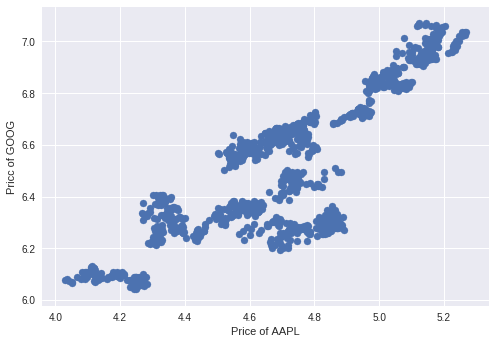

In [0]:
plt.scatter(np.log(aapl["Close"]), np.log(goog["Close"]))
plt.xlabel('Price of AAPL')
plt.ylabel('Pricc of GOOG')
plt.show



선형 회귀의 개념은 표적 또는 종속 변수(y)와 일련의 설명적 변수(x1, x2…)사이의 관계를 찾는 것이다. 

이렇게 유추한 변수들간의 관계는 다른 값을 예측하는 데 사용할 수 있다.

위 plot은 SK하이닉스와 LG전자의 가격의 분포를 나타낸 산점도이다.

이처럼 변수가 하나인 경우 이 관계는 베타 파라미터β로 정의되는 라인이며 y=β0+βx1형식이며, 여기서β0은 절편값을 의미한다. 

이는 방정식을 벡터 형태로 확장하여 다 변수 회귀로 확장 할 수 있다 : y = Xβ 

회귀선은 아래의 plot과 같이 다양한 case로 구현이 가능하다. 그렇다면 어떻게 해야 최적화된 회귀선을 찾을 수 있는가?

Text(0,0.5,u'Pricc of SK_H')

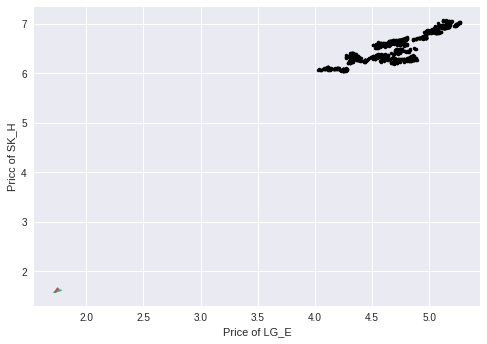

In [0]:
plt.plot(np.log(aapl["Close"]), np.log(goog["Close"]), "k.")
plt.plot([1.73, 1.76], [1.58,1.64], '-')
plt.plot([1.72, 1.78], [1.58,1.62], '-')
plt.plot([1.73, 1.75], [1.59,1.66], '-')
plt.xlabel('Price of LG_E')
plt.ylabel('Pricc of SK_H')

### Cost Function

데이터를 모델링 하기 위한 최상의 라인을 만들기 위해서는 예측 값을 가능한 실제 값에 근접하게 할 수 있는 베타값을 선택해야 한다. 

이는 곧 가설 h(x)와 y사이의 거리나 잔차들을 최소화시켜야 한다는 것을 의미한다.

이에 본 수업은 cost function을 ordinary least squares(OLS)로 정의하여 사용하는데, 이는 간단한 최소제곱의 합을 의미한다.

선형 회귀선을 찾기 위해, 베타값을 조정시켜 이를 최소화 시킨다. 이를 위한 식은 아래와 같다.

$$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(h_\beta(x^{(i)})-y^{(i)})^2$$

우리가 입증하고자 하는 가설은 아래의 선형 모델을 따르고,

$$h_\beta(x) = \beta^{T}x = \beta_0 + \beta_1x_1$$

**Gradient descent**를 통해 반복적 업데이트를 시행함으로써 최적의 모델을 찾아낼 수 있다.

$$\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}$$

### Gradient Descent

**Gradient descent**는 함수를 따라 작은 스텝을 만들어 로컬 최소값을 찾는 알고리즘이다.


**Gradient descent**는 간단한 2차 방정식을 통해 그 형식을 볼 수 있다.

Text(0.5,1,u'Quadratic Equation')

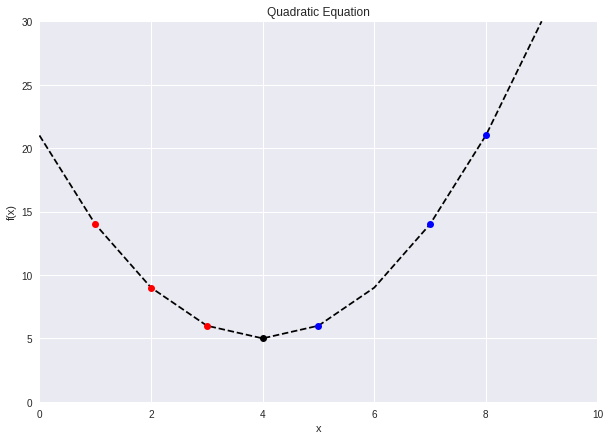

In [0]:
x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2+5 for n in x_quad]


plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4, 5, 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Equation')


이 함수에서 로컬 최소값을 찾기 위해 x=2의 첫번째 빨간 점에서 시작하면 **gradient**를 찾을 수 있다.

이 경우 **gradient**는 기울기를 의미하며, x=2에서 찾은 기울기의 값이 음수이기 때문에 

다음 포인트를 오른쪽 값으로 잡으면 기울기의 최소값에 더 가까이 도달할 수 있다.

마찬가지로 x=8의 지점에서 시작하면 **gradient**, 즉 기울기 값이 양수이므로 다음 포인트를 왼쪽으로 옮기게 되고, 

이러한 작업들을 계속해서 반복함을 통해 매개 변수가 우리가 찾고있는 최소값으로 수렴 할 때까지 **gradient**값을 0에 최대한 도달하도록 할 수 있다.

이러한 작업들은 실제로 매개 변수 베타를 계속 업데이트하여 점점 더 최소화시키고 있다.

$$\beta_j := \beta_j - \alpha\frac{\partial}{\partial \beta_j} J(\beta)$$

이 식에서 α는 학습 속도를 의미하고, 식을 통해 베타값에 대한 partial differentiation을 볼 수 있다.

이러한 방식을 **“batch" gradient descent**라고 부르는데, 이는 우리는 점 X의 batch를 통해 각 **gradient**를 한점에 한번씩 산출해내기 때문이다.

### Sample in Python

파이썬으로 실습을 하기 위해 먼저 매개 변수를 선언한다. 알파는 학습률이며, iterations는 반복을 통해 업데이트를 수행 할 횟수를 의미한다.

이러한 작업 이후 데이터를 보관하는 데이터 프레임을 간단한 행렬 연산을 위해 배열로 변환해야한다. 

그리고 앞서 설명해준 비용 함수를 계산하는 함수를 작성하면 된다. 


In [0]:
iterations = 1500
alpha = 0.01


X_df = pd.DataFrame(np.log(aapl["Close"]))
y_df = pd.DataFrame(np.log(goog["Close"]))

## 데이터 프레임에 절편값의 칼럼을 추가해준다.
X_df['intercept'] = 1

## Dataframe을 행렬연산을 위해 array로 변환한다.
## 베타값의 시작은 (0,0)으로 잡는다.
X = np.array(X_df)
y = np.array(y_df).flatten()
beta = np.array([0, 0])

In [0]:
def cost_function(X, y, beta):
    m = len(y)   # 훈련시킬 횟수
    J = np.sum((X.dot(beta)-y)**2)/2/m
    return(J)

In [0]:
cost_function(X, y, beta)

0.34326501022793454

이제 **gradient descent algorithm**을 단계별로 나누어 어떤 과정들이 이루어지는지 확인한다.

1. Calculate hypothesis hβ(x)
2. Calculate loss (hβ(x)−y)
3. Calculate gradient (hβ(x)−y)xj
4. Update parameter beta
5. And find the cost by using cost_function()

In [0]:
def gradient_descent(X, y, beta, alpha, iterations):
 
    cost_history = [0] * iterations
    m = len(y)
    
    for iteration in range(iterations):
        hypothesis = X.dot(beta)
        loss = hypothesis - y
        gradient = X.T.dot(loss)/m
        beta = beta - alpha*gradient
        cost = cost_function(X, y, beta)
        cost_history[iteration] = cost
    return(beta, cost_history)

In [0]:
(t, c) = gradient_descent(X, y, [1, 1], 0.01, 1000)

In [0]:
print(t)

[1.15069609 1.09492541]


In [0]:
## Plotting the best fit line
best_fit_x = np.linspace(10.70, 10.80, 22)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

Text(0,0.5,u'Pricc of GOOG')

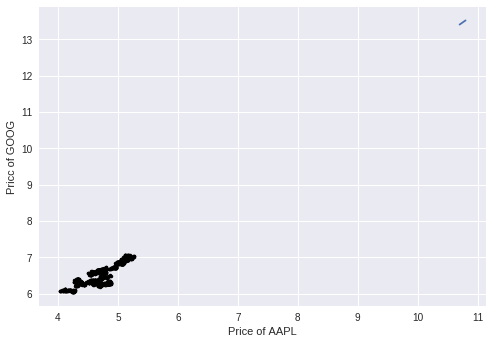

In [0]:
plt.plot(np.log(aapl["Close"]), np.log(goog["Close"]), "k.")
plt.plot(best_fit_x, best_fit_y, '-')
plt.xlabel('Price of AAPL')
plt.ylabel('Pricc of GOOG')